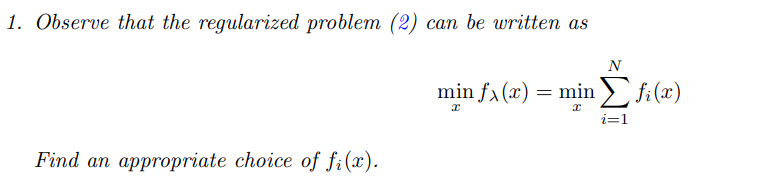

$f_λ(x) = \frac{λ}{2}x^Tx+\frac{1}{2}∥Ax − y∥^2_2$

Here,
$∥Ax − y∥_2^2 =\sum_{i=1}^N (a_i^Tx - y_i)^2$  , **where i is the number of observations and d is the dimension.**

Therefore,

$f_i(x) =\frac{1}{2}( \sum_{i=1}^N (a_i^Tx - y_i)^2 + \frac{λ}{N}X^TX)$


Therfore, gradient = $ \sum_{i=1}^N (a_i^Tx - y_i)a_i + λx  $

$ => g_i(x) =  (a_i^Tx - y_i)a_i + \frac{\lambda}{n}x$

In [ ]:
import numpy as np
import timeit

In [ ]:
def f(x, lamda):
  return 0.5*np.linalg.norm(A @ x-y)**2 + 0.5*lamda*np.dot(x,x)

def grad(x, lamda):
  sum = np.array([0. for _ in range(d)])
  for i in range(N):
    sum += (A[i]@x - y[i])[0]*A[i]
  sum += lamda*x
  return sum


In [4]:
np . random . seed (1000) #for repeatability
N = 200
d =  20000
lambda_reg = 0.001
eps = np.random.randn(N ,1) # random noise
# Create data matrix , label vector
A = np.random.randn(N,d)

# Normalize the columns

for j in range ( A . shape [1]) :
    A [: , j ] = A [: , j ]/ np . linalg . norm ( A [: , j ])
xorig = np . ones ( (d ,1) )
y = np . dot (A , xorig ) + eps

x = np.zeros((d,1)).flatten()
epochs = 10**4 # initialize the number of rounds needed to process
t = 1
arr = np.arange(N) # index array

start = timeit.default_timer () # start the timer
for epoch in range( epochs ) :
      np.random.shuffle(arr) # shuffle every epoch
      for i in np.nditer(arr):
          g_i = (A[i]@x - y[i])[0]*A[i] + (lambda_reg/N)*x
          x =  x -  g_i/t
          t = t +1
          if t >10**4 :
              t = 1
alglab6time = timeit . default_timer () - start # time is in seconds
x_alglab6 = x

print('-------------------------------------------------------------')
print('Time Taken = ',alglab6time)
print("Norm of Gradient at x* : ", np.linalg.norm(grad(x_alglab6, lambda_reg)))
print('|| Ax_alglab6 - y||^2',np.linalg.norm(A@x - y)**2)
print('|| x_alglab6 - xorig ||^2',np.linalg.norm(x - xorig.flatten())**2)
# print the time taken , || Ax_alglab6 - y||^2 , || x_alglab6 - xorig ||^2

-------------------------------------------------------------
Time Taken =  173.80064462300004
Norm of Gradient at x* :  0.012318516350085741
|| Ax_alglab6 - y||^2 6274934.393931907
|| x_alglab6 - xorig ||^2 19847.919033137703


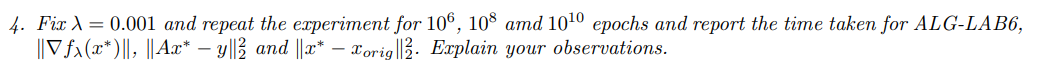

In [7]:
np . random . seed (1000) #for repeatability
N = 200
d =  20000
lambda_reg = 0.001
eps = np.random.randn(N ,1) # random noise
# Create data matrix , label vector
A = np.random.randn(N,d)

# Normalize the columns

for j in range ( A . shape [1]) :
    A [: , j ] = A [: , j ]/ np . linalg . norm ( A [: , j ])
xorig = np . ones ( (d ,1) )
y = np . dot (A , xorig ) + eps

x = np.zeros((d,1)).flatten()
epochs = [10**3,10**5] # initialize the number of rounds needed to process
t = 1
arr = np.arange(N) # index array
for ele in epochs:
      start = timeit.default_timer () # start the timer
      for epoch in range(ele) :
            np.random.shuffle(arr) # shuffle every epoch
            for i in np.nditer(arr):
                g_i = (A[i]@x - y[i])[0]*A[i] + (lambda_reg/N)*x
                x =  x -  g_i/t
                t = t +1
                if t >10**4 :
                    t = 1
      alglab6time = timeit . default_timer () - start # time is in seconds
      x_alglab6 = x

      print('-------------------------------------------------------------')
      print('epoch value = ',ele)
      print('Time Taken = ',alglab6time)
      print("Norm of Gradient at x* = ", np.linalg.norm(grad(x_alglab6, lambda_reg)))
      print('|| Ax_alglab6 - y||^2 = ',np.linalg.norm(A@x - y)**2)
      print('|| x_alglab6 - xorig ||^2 = ',np.linalg.norm(x - xorig.flatten())**2)


-------------------------------------------------------------
epoch value =  1000
Time Taken =  18.749281997999788
Norm of Gradient at x* =  0.01568795589324699
|| Ax_alglab6 - y||^2 =  6274940.204884397
|| x_alglab6 - xorig ||^2 =  19847.919073461217
-------------------------------------------------------------
epoch value =  100000
Time Taken =  1672.3086127779998
Norm of Gradient at x* =  0.012702901454757075
|| Ax_alglab6 - y||^2 =  6274942.285321928
|| x_alglab6 - xorig ||^2 =  19847.919080368334


##OBSERVATION

**Here it is seen that the gradient at the minimizer decreased as we  increased the epoch value but the error value increased**

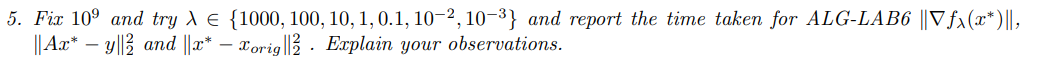

In [17]:
np . random . seed (1000) #for repeatability
N = 200
d =  20000
lmbda = ['1000', '100', '10', '1', '0.1', '0.01', '0.001']
eps = np.random.randn(N ,1) # random noise
# Create data matrix , label vector
A = np.random.randn(N,d)

# Normalize the columns

for j in range ( A . shape [1]) :
    A [: , j ] = A [: , j ]/ np.linalg.norm( A [: , j ])
xorig = np.ones((d,1))
y = np.dot (A , xorig ) + eps

x = np.zeros((d,1)).flatten()
epochs = 10**5 # initialize the number of rounds needed to process
t = 1
arr = np.arange(N) # index array
for lambda_reg in lmbda:
      start = timeit.default_timer () # start the timer
      for epoch in range(epochs) :
            np.random.shuffle(arr) # shuffle every epoch
            for i in np.nditer(arr):
                g_i = (A[i]@x - y[i])[0]*A[i] + (float(lambda_reg)/N)*x
                x =  x -  g_i/t
                t = t +1
                if t >10**4 :
                    t = 1
      alglab6time = timeit . default_timer () - start # time is in seconds
      x_alglab6 = x

      print('-------------------------------------------------------------')
      print('epoch value = ',ele)
      print('Time Taken = ',alglab6time)
      print("Norm of Gradient at x* = ", np.linalg.norm(grad(x_alglab6, float(lambda_reg))))
      print('|| Ax_alglab6 - y||^2 = ',np.linalg.norm(A@x - y)**2)
      print('|| x_alglab6 - xorig ||^2 = ',np.linalg.norm(x - xorig.flatten())**2)

-------------------------------------------------------------
epoch value =  100000
Time Taken =  1671.2361166839983
Norm of Gradient at x* =  10.862962278932955
|| Ax_alglab6 - y||^2 =  3168747.3031069087
|| x_alglab6 - xorig ||^2 =  19972.934359903542
-------------------------------------------------------------
epoch value =  100000
Time Taken =  1667.792918610001
Norm of Gradient at x* =  30.669092454583073
|| Ax_alglab6 - y||^2 =  3970619.5555421966
|| x_alglab6 - xorig ||^2 =  19883.395339153067
-------------------------------------------------------------
epoch value =  100000
Time Taken =  1672.8031769729969
Norm of Gradient at x* =  267.5496008144138
|| Ax_alglab6 - y||^2 =  5878541.551802303
|| x_alglab6 - xorig ||^2 =  19855.833066015708
-------------------------------------------------------------
epoch value =  100000
Time Taken =  1672.0972203970014
Norm of Gradient at x* =  30.480577092339132
|| Ax_alglab6 - y||^2 =  6246650.6250664145
|| x_alglab6 - xorig ||^2 =  19848.

##OBSERVATION
Here it is seen that the norm value kept on decreasing as we decreased the value of $λ$ except at λ = 100 and the $(norm(Ax_alglab6 - y))^2$ increased.And the norm squared term of the minimizer decreased till λ = 0.1 and then it again increased.

###6. Does ALG-LAB6 work for failure dimension?

**Yes the algorithmn was able to work for higher dimensions which was not possible for the newtons and bfgs method**

###7. Explain your understanding of ALG-LAB6.


**Here it is seen that the algorithm iterates through data points, updating the optimization variable x.The update rule is: $x \leftarrow x - \frac{1}{t} \cdot g_i(x)$, where $g_i(x)$ is the gradient at point $i$ and before doing that the algorithm shuffles data points in each epoch. And This process continues for a specified number of epochs (10,000 in this case).**

**Since this algorithmn avoids storing the full hessian matrix and follows an iterative process, it is able to handle large-scale problems.**